In [2]:
import numpy as np
import math
from random import seed
from random import random
from numba import jit, prange

from functions import comp_shortest_path, read_tsp_file, read_data, TestResult

In [2]:
T_start = 1000
T_end = 0.005
cooling_factor = 0.99
nMarkov = 280
coords = read_tsp_file("TSP-Configurations/a280.tsp")


In [12]:
def loop(n, nmarkov=nMarkov):
    for i in range(n):
        itr, min_cost, optimal_list_cities, best_cost = comp_shortest_path(
            T_start, T_end, cooling_factor, nmarkov, coords, dataset="a280", save_data=True)
        
def loop_markov(nloop, nmarkov_list):
    for nmarkov in nmarkov_list:
        loop(nloop,nmarkov)
    
        
        
# loop_markov(2,[140, 280])

In [13]:
ncities = 280
start = int(ncities/4)
step = start
stop = int(ncities*5+step)
nmarkov_list = np.arange(start, stop, step, dtype=int)

# loop_markov(25, nmarkov_list)
    

In [3]:
df = read_data()
headers = TestResult.headers()
df = df[df["Dataset"] == "a280"]

In [4]:
df.describe()


,Minimal Cost,iterations,Computation Time,Start Temperature,End Temperature,Markov Chain Length
count,504.000000,504.0,504.000000,504.0,504.000,504.000000
mean,2884.893972,1215.0,14.465961,1000.0,0.005,731.111111
std,178.836642,0.0,9.363778,0.0,0.000,404.816866
min,2672.071370,1215.0,1.254679,1000.0,0.005,70.000000
25%,2784.892692,1215.0,7.134224,1000.0,0.005,350.000000
50%,2837.991439,1215.0,13.751603,1000.0,0.005,700.000000
75%,2902.878365,1215.0,20.959207,1000.0,0.005,1050.000000
max,3694.305961,1215.0,97.068972,1000.0,0.005,1400.000000


In [17]:
# # df.describe()
# df.groupby(headers[6]).describe()

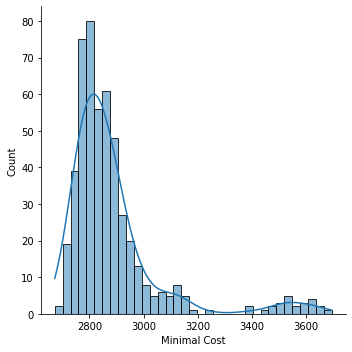

In [22]:
import seaborn as sns
headers = TestResult.headers()
sns.displot(data=df[df[headers[6]] == 0.005], x=headers[0], kde=True)


In [1]:
sns.violinplot(data=df, x=headers[9], y=headers[0])

NameError: name 'sns' is not defined

In [51]:
dataset = "gsdag"
dataset != ""

True

In [ ]:
from functions import read_tsp_file_opt, total_dist, distance_matrix
coords = read_tsp_file("TSP-Configurations/a280.tsp")
opt_tour = read_tsp_file_opt("TSP-Configurations/a280.opt.tour.txt")

dist_matrix = distance_matrix(coords=coords)
optimal_tour_length = total_dist(opt_tour, dist_matrix)
